In [1]:
#importing libraries

import random as rd
import hashlib
import phe
import rsa
import matplotlib.pyplot as plt
from timeit import default_timer as timer
import numpy as np



In [2]:
#declaring of varibles
numberOfExperts = 0
numberOfCandidates = 0
keySize = 0
#collection of homomophic public and private keys
dictionaryOfExpertPublicKeys = {}
dictionaryOfExpertPrivateKeys = {}

dictionaryOfCandidatesPublicKeys = {}
dictionaryOfCandidatesPrivateKeys = {}

publicKeyEmployer,privateKeyEmployer = 0,0


#Collection of rsa public and private keys for digital signature
dictOfrsaPubKey = {}
dictOfrsaPriKey = {}
marksToCandidates = []


In [3]:
def initVariables(E,C,key):
    global numberOfExperts, numberOfCandidates, keySize
    numberOfExperts, numberOfCandidates, keySize = E, C, key

In [4]:
#code to generate rsa public and private keys
def generateRSAKeys():
    global dictOfrsaPubKey, dicOfrsaPriKey
    for i in range(numberOfExperts):
        (pubkey, privkey) = rsa.newkeys(512)
        dictOfrsaPubKey[i],dictOfrsaPriKey[i] = pubkey, privkey 

In [5]:
#this part of the code create the public and private homomorphic key pairs
def generateHomomorphickeyPairs():
    global publicKeyEmployer,privateKeyEmployer
    publicKeyEmployer,privateKeyEmployer = phe.generate_paillier_keypair(n_length= keySize)
    for i in range(numberOfExperts):
        x,y = phe.generate_paillier_keypair(n_length= keySize)
        dictionaryOfExpertPublicKeys[i] = x
        dictionaryOfExpertPrivateKeys[i] = y
        
    for i in range(numberOfCandidates):
        x,y = phe.generate_paillier_keypair(n_length= keySize)
        dictionaryOfCandidatesPublicKeys[i]= x
        dictionaryOfCandidatesPrivateKeys[i] = y 

In [6]:
# function to create digital signature
def createDigitalSignature(message,i):
    privkey = dictOfrsaPriKey[i]
    temp = str(message).encode()
    signature = rsa.sign(temp, privkey, 'SHA-1')
    return signature

In [7]:
# tjhis part of the code works as the employer of the seconde frame work who finds the est candidate
def employerFindingBestCandidate(array):
    array = [privateKeyEmployer.raw_decrypt(x) for x in array]
    print(array.index(max(array)))
    print(array)

In [8]:
# this part of the code works as the candidate manager who adds the marks by multiplication of the encrytpion and than passes them to the employer
def candidateManagerFrameWork2BestCandidate():
    array  = []
    for i in range(len(marksToCandidates[0])):
        sum = 1
        for j in range(len(marksToCandidates)):
            sum = sum * marksToCandidates[j][i][0]
        array.append(sum)
    return array
  

In [9]:
def expertFunctionToGiveMarks():
    global marksToCandidates
    marksToCandidates = [[0 for i in range(numberOfCandidates)] for j in range(numberOfExperts)]
    start = timer()
    #this part of code simulates the expert giving marks to the candidates and storing them in form of matrix
    for i in range(numberOfExperts):
        for j in range(numberOfCandidates):
            mark = rd.randint(0,10)
            encryptedMark = publicKeyEmployer.raw_encrypt(mark)
            marksToCandidates[i][j] = [encryptedMark,createDigitalSignature(encryptedMark,i)]
    end = timer()
    return(end - start)
    

In [10]:
def runSimulation(experts,candidates,flag,keySize):
    experts = experts
    timeList = []
    candidates = candidates
    totalTime = 0
    if flag == "candidates":
        for i in range(len(candidates)):
            start = timer()
            initVariables(experts,candidates[i],keySize)
            generateHomomorphickeyPairs()
            generateRSAKeys()
            end = timer()
            t1 = end - start
            t2 = expertFunctionToGiveMarks()
            start = timer()
            candidateManagerFrameWork2BestCandidate()
            end = timer()
            t3 = end - start
            totalTime = t1 + (t2/experts) + t3
            timeList.append(totalTime)
    else: 
        for i in range(len(experts)):
            start = timer()
            initVariables(experts[i],candidates,keySize)
            generateHomomorphickeyPairs()
            generateRSAKeys()
            end = timer()
            t1 =end -start
            t2 = expertFunctionToGiveMarks()
            start = timer()
            candidateManagerFrameWork2BestCandidate()
            end = timer()
            t3 = end - start
            totalTime = t1 + (t2/ experts[i]) + t3
            timeList.append(totalTime)
    # print(timeList)
    return (timeList)

In [25]:
#this part of the code run the simulation for defined number of times and helps us to calcuate average execution time
def averageTimeConsumedFunction(experts, candidates,flag,keySize):
    timeMatrix = []
    for i in range(0,4):
        timeList= runSimulation(experts, candidates,flag,keySize)
        timeMatrix.append(timeList)
    # print(timeMatrix)        
    arr = np.array(timeMatrix, dtype='float32')
    # print(arr)
    columns_average = arr.mean(axis=0)

    if flag == "candidates":
        plt.title("Number of experts " + str(experts) + " and key size of " + str(keySize))
        plt.xlabel("Number Of Candidates")
        plt.ylabel("Average Execution Time(seconds)")   
        plt.bar(candidates, columns_average)
        plt.show()
        print(columns_average)
    else :
        plt.title("Number of candidates = " + str(candidates) + " and key size of " + str(keySize))
        plt.xlabel("Number Of Experts")
        plt.ylabel("Average Execution Time(seconds)")   
        plt.bar(experts, columns_average)
        plt.show()
        print(columns_average)

    
    return columns_average

        


In [12]:
def simulationHavingExpertsConstCandidatesVariable(experts, candidates,flag,keySize):
    column_average = averageTimeConsumedFunction(experts,candidates,flag,keySize)
    return column_average

In [13]:
def simulationHavingExpertsvariableCandidatesConst(experts,candidates,flag,keySize):
    column_average = averageTimeConsumedFunction(experts,candidates,flag,keySize)
    return column_average

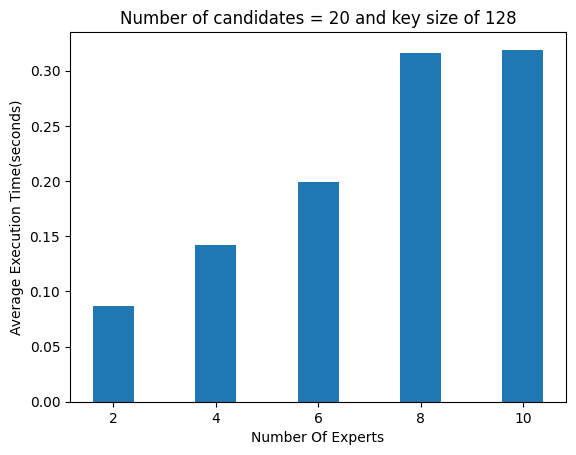

[0.08700055 0.1417906  0.19892195 0.31621024 0.31896853]


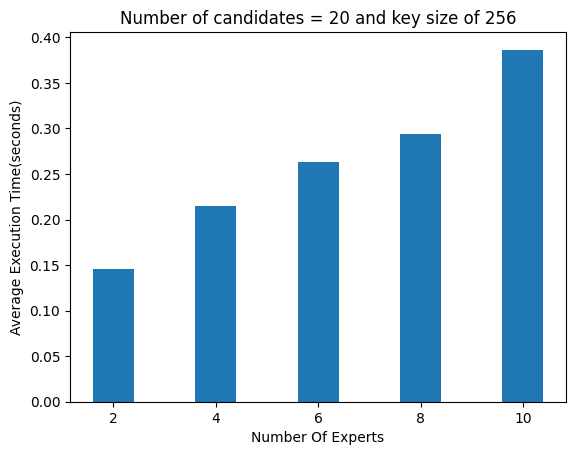

[0.14584365 0.21473953 0.2625766  0.29426685 0.38635615]


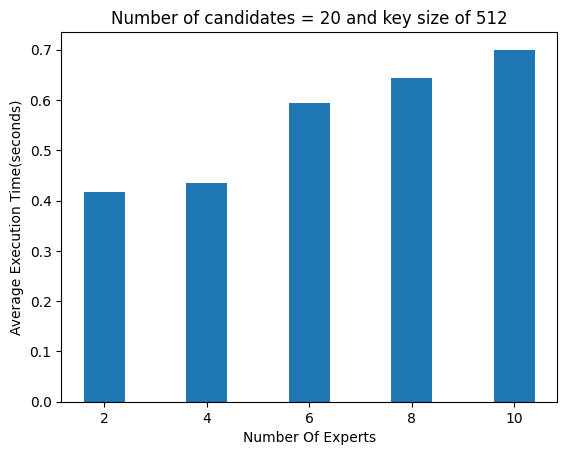

[0.41794282 0.43443274 0.5949474  0.64459187 0.69996625]


In [26]:
keys = [128,256,512]
F2Time = []
for i in range(0,3):
    time = simulationHavingExpertsvariableCandidatesConst([2,4,6,8,10],20,"experts",keys[i])
    F2Time.append(time)


In [23]:
%store F2Time

Stored 'F2Time' (list)


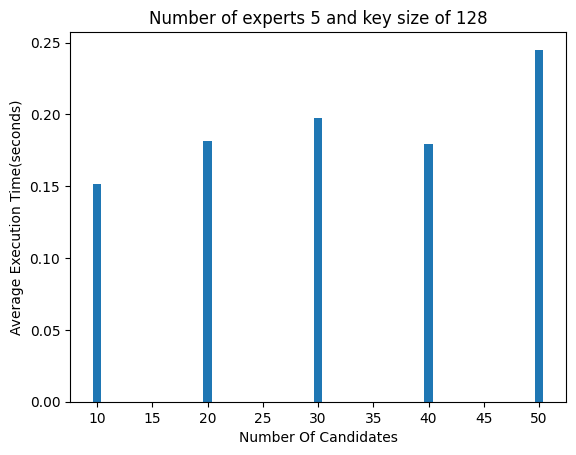

[0.15181324 0.18115146 0.19751832 0.17960922 0.24503182]


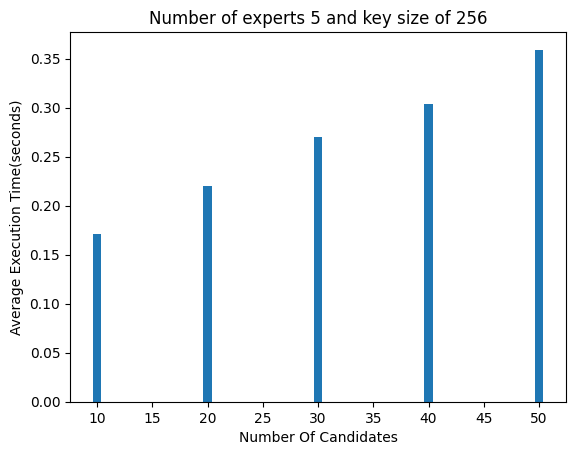

[0.17146109 0.21995342 0.27041042 0.30362433 0.35910565]


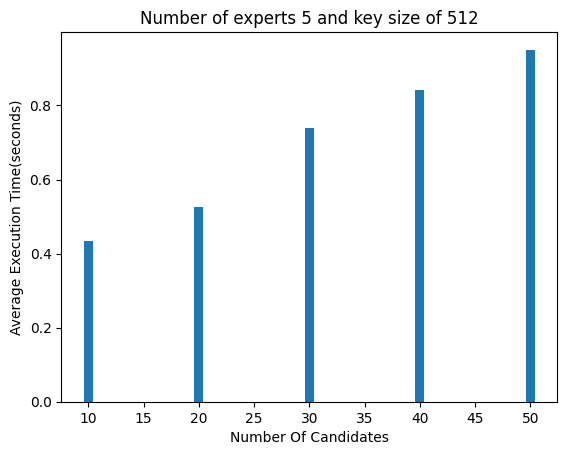

[0.4349677  0.5246648  0.7403426  0.84182024 0.9504242 ]
Stored 'F2TimeCandidateVariable' (list)


In [17]:
keys = [128,256,512]
F2TimeCandidateVariable = []
for i in range(0,3):
    time = simulationHavingExpertsConstCandidatesVariable(5,[10,20,30,40,50],"candidates",keys[i])
    F2TimeCandidateVariable.append(time)
%store F2TimeCandidateVariable
